**LAB Assignment-2**

**Q1.**

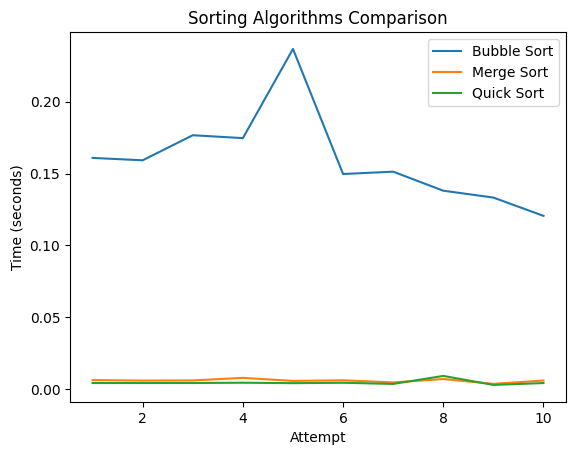

In [1]:
import random
import time
import matplotlib.pyplot as plt

def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]

def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        L = arr[:mid]
        R = arr[mid:]

        merge_sort(L)
        merge_sort(R)

        i = j = k = 0

        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1

        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1

        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1

def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + middle + quick_sort(right)

# Generate 1000 random integers between 1 and 10000
random_numbers = [random.randint(1, 10000) for _ in range(1000)]

# Initialize lists to store the time taken by each sorting algorithm
bubble_sort_times = []
merge_sort_times = []
quick_sort_times = []

# Perform sorting and measure the time taken for each algorithm
for _ in range(10):  # Repeat the process 10 times for better accuracy
    start_time = time.time()
    bubble_sort(random_numbers.copy())
    bubble_sort_times.append(time.time() - start_time)

    start_time = time.time()
    merge_sort(random_numbers.copy())
    merge_sort_times.append(time.time() - start_time)

    start_time = time.time()
    quick_sort(random_numbers.copy())
    quick_sort_times.append(time.time() - start_time)

# Plotting the results
plt.plot(range(1, 11), bubble_sort_times, label='Bubble Sort')
plt.plot(range(1, 11), merge_sort_times, label='Merge Sort')
plt.plot(range(1, 11), quick_sort_times, label='Quick Sort')
plt.xlabel('Attempt')
plt.ylabel('Time (seconds)')
plt.title('Sorting Algorithms Comparison')
plt.legend()
plt.show()


**Q2.**

In [2]:
import heapq

def merge_sorted_lists(sorted_lists):
    min_heap = []

    # Initialize the heap with the first element from each list along with the list index
    for i, lst in enumerate(sorted_lists):
        if lst:
            heapq.heappush(min_heap, (lst[0], i, 0))

    result = []
    while min_heap:
        val, list_index, element_index = heapq.heappop(min_heap)
        result.append(val)

        # Move to the next element in the list from which the minimum element was extracted
        if element_index + 1 < len(sorted_lists[list_index]):
            heapq.heappush(min_heap, (sorted_lists[list_index][element_index + 1], list_index, element_index + 1))

    return result

# Example input
sorted_lists = [
    [10, 20, 30, 40],
    [15, 25, 35],
    [27, 29, 37, 48, 93],
    [32, 33]
]

# Printing the efficiently sorted order
print(merge_sorted_lists(sorted_lists))


[10, 15, 20, 25, 27, 29, 30, 32, 33, 35, 37, 40, 48, 93]


**Q3.**

In [3]:
import heapq

def find_k_largest_elements(nums, k):
    if k >= len(nums):
        return sorted(nums, reverse=True)

    min_heap = nums[:k]  # Initialize min-heap with first K elements
    heapq.heapify(min_heap)

    # Iterate through the remaining elements
    for num in nums[k:]:
        if num > min_heap[0]:
            heapq.heappop(min_heap)
            heapq.heappush(min_heap, num)

    # Return the K largest elements in sorted order
    return sorted(min_heap, reverse=True)

# Example usage
nums = [3, 10, 4, 7, 15, 20, 8]
k = 3
print(find_k_largest_elements(nums, k))


[20, 15, 10]


**Q4.**

In [4]:
def select_activities(activities):
    if not activities:
        return []

    # Sort activities by their finish times
    sorted_activities = sorted(activities, key=lambda x: x[1])

    selected_activities = [sorted_activities[0]]
    last_activity_finish_time = sorted_activities[0][1]

    # Iterate through the sorted activities and select non-overlapping activities
    for activity in sorted_activities[1:]:
        if activity[0] >= last_activity_finish_time:
            selected_activities.append(activity)
            last_activity_finish_time = activity[1]

    return selected_activities

# Example input
activities = [(1, 4), (3, 5), (0, 6), (5, 7), (3, 8), (5, 9), (6, 10), (8, 11), (8, 12), (2, 13), (12, 14)]

# Output the maximum number of activities performed by a single person
print(select_activities(activities))


[(1, 4), (5, 7), (8, 11), (12, 14)]


*Q5.*

In [5]:
def merge_intervals(intervals):
    if not intervals:
        return []

    # Sort intervals by their start times
    sorted_intervals = sorted(intervals, key=lambda x: x[0])

    merged_intervals = [sorted_intervals[0]]

    # Iterate through the sorted intervals and merge overlapping intervals
    for interval in sorted_intervals[1:]:
        if interval[0] <= merged_intervals[-1][1]:  # Overlapping intervals
            merged_intervals[-1] = (merged_intervals[-1][0], max(merged_intervals[-1][1], interval[1]))
        else:
            merged_intervals.append(interval)

    return merged_intervals

# Example input
intervals = [(1, 4), (2, 5), (7, 8), (6, 9)]

# Output the non-overlapping intervals after merging
print(merge_intervals(intervals))


[(1, 5), (6, 9)]
